<a href="https://colab.research.google.com/github/ogut77/estat.me/blob/main/Chapter5_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Example 5.2.1 Testing hypothesis for a population mean with known population standard deviation.
# # Enter mu_0, n, xbar, and population standard deviation, then calculate test statistic and p-value.

import math
from scipy.stats import norm

mu0 = 1500
n = 30
xbar = 1555
sigma = 200

teststat = (xbar - mu0) / (sigma / math.sqrt(n))
print(f"Test statistic: {teststat}")

pvalue = norm.sf(teststat) # Survival function (1 - CDF)
print(f"P-value: {pvalue}")


Test statistic: 1.5062370331392068
P-value: 0.06600316790918383


In [2]:
#Example 5.2.2 Testing hypothesis for a population mean with unknown population standard deviation.
# Enter mu_0, n, xbar, and sample standard deviation, then calculate test statistic and p-value.


import math
from scipy.stats import t

# Example 5.2.2 Testing hypothesis for a population mean with unknown population standard deviation.
# Enter mu_0, n, xbar, and sample standard deviation, then calculate test statistic and p-value.

mu0 = 250
n = 16
xbar = 253
s = 10

teststat = (xbar - mu0) / (s / math.sqrt(n))
print(f"Test statistic: {teststat}")

pvalue = t.sf(teststat, n-1) # Survival function (1 - CDF)
print(f"P-value: {pvalue}")


Test statistic: 1.2
P-value: 0.12437489369401128


In [3]:
# prompt: # Example 5.3.1 Testing hypothesis for two populations means when population variances are equal.
# # Enter n1, n2, xbar1, xbar2, s1, and s2, then calculate the pooled variance, test statistic and p-value.


import math
from scipy.stats import norm
from scipy.stats import t

# Example 5.3.1 Testing hypothesis for two populations means when population variances are equal.
# Enter n1, n2, xbar1, xbar2, s1, and s2, then calculate the pooled variance, test statistic and p-value.

n1 = 15
n2 = 14
xbar1 = 275
xbar2 = 269
s1 = 12
s2 = 10

pooledvar = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)
print(f"Pooled Variance: {pooledvar}")

teststat = (xbar1 - xbar2) / math.sqrt(pooledvar / n1 + pooledvar / n2)
print(f"Test statistic: {teststat}")

pvalue = 2 * t.sf(abs(teststat), n1 + n2 - 2) # Use abs for two-tailed test, sf for survival function
print(f"P-value: {pvalue}")


Pooled Variance: 122.81481481481481
Test statistic: 1.4569227333394668
P-value: 0.15667027233049496


In [13]:
# prompt: # Example 5.4.1 Testing hypothesis for several populations means; one-way ANOVA.
# # Enter data and change the level as a factor (as.factor()).
# y <- c(81,75,69,90,72,83, 65,80,73,79,81,69, 72,67,62,76,80, 89,94,79,88)
# f <- c(rep(1,6), rep(2,6), rep(3,5), rep(4,4))
# af <- as.factor(f)
# ymean <- tapply(y, af, mean)
# ymean

import statsmodels.formula.api as sm
# Import the correct module for anova_lm
from statsmodels.stats.anova import anova_lm

# Example 5.4.1 Testing hypothesis for several populations means; one-way ANOVA.
y = [81,75,69,90,72,83, 65,80,73,79,81,69, 72,67,62,76,80, 89,94,79,88]
f = [1,1,1,1,1,1, 2,2,2,2,2,2, 3,3,3,3,3, 4,4,4,4]

# Create a pandas DataFrame
import pandas as pd
df = pd.DataFrame({'y': y, 'af': f})

# Fit the one-way ANOVA model
model = sm.ols('y ~ C(af)', data=df).fit()

# Print the ANOVA table
# Call anova_lm directly from the imported module
print(anova_lm(model, typ=2))

              sum_sq    df         F    PR(>F)
C(af)     643.633333   3.0  4.346973  0.019054
Residual  839.033333  17.0       NaN       NaN


<Figure size 800x600 with 0 Axes>

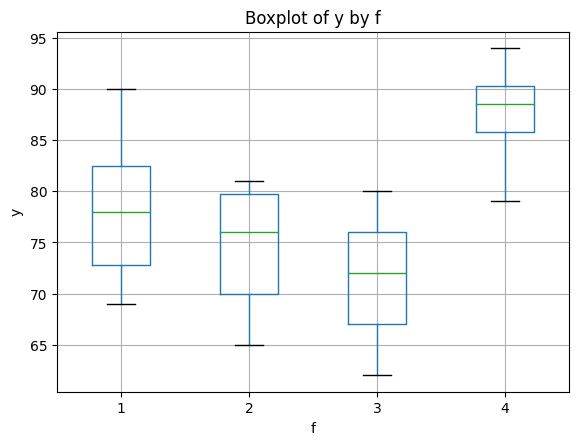

In [14]:

import matplotlib.pyplot as plt # Import the pyplot module from matplotlib

# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
df.boxplot(column='y', by='af')
plt.title('Boxplot of y by f')
plt.suptitle('') # Remove default suptitle
plt.xlabel('f')
plt.ylabel('y')
plt.show()


In [15]:


import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import pandas as pd
#Fit the model
model = sm.ols('y ~ C(af)', data=df).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2)

anova_table


,sum_sq,df,F,PR(>F)
C(af),643.633333,3.0,4.346973,0.019054
Residual,839.033333,17.0,NaN,NaN


In [10]:

import math
from scipy.stats import norm
from scipy.stats import t
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm
import pandas as pd
import matplotlib.pyplot as plt

# Example 5.5.1 Regression analysis.
# Enter data and change the level as a factor (as.factor()).
x = [4,6,6,8,8,9,9,10,12,12]
y = [39,42,45,47,50,50,52,55,57,60]

# Create a pandas DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# Fit the linear regression model
rg = sm.ols('y ~ x', data=df).fit()
# Print the regression summary
print(rg.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     172.1
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.09e-06
Time:                        19:49:27   Log-Likelihood:                -17.016
No. Observations:                  10   AIC:                             38.03
Df Residuals:                       8   BIC:                             38.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.6722      1.670     17.166      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


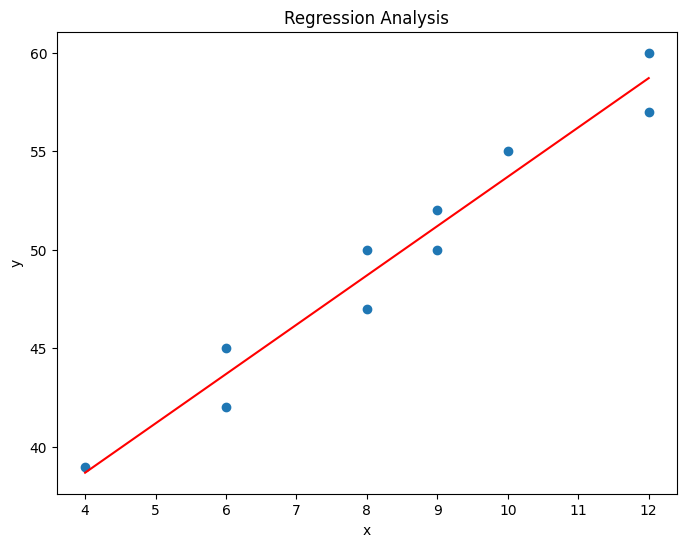

In [11]:



# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, rg.predict(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Analysis')
plt.show()


In [12]:

# Example 5.5.3 Multiple regression analysis.
# Enter data and change the level as a factor (as.factor()).
import pandas as pd
import statsmodels.formula.api as sm

y = [0.291,0.291,0.288,0.464,0.532,0.557,0.441,0.515,0.603,0.628,0.956,0.775,0.727,0.704,1.084]
x1 = [21.0,21.8,22.3,26.6,27.1,27.4,27.9,27.9,29.7,32.7,32.7,33.7,34.7,35.0,40.6]
x2 = [21.33,19.81,19.20,21.94,24.68,25.29,20.11,22.86,21.03,22.55,25.90,26.21,21.64,19.50,21.94]

# Create a pandas DataFrame
df = pd.DataFrame({'y': y, 'x1': x1, 'x2': x2})

# Fit the multiple linear regression model
rg2 = sm.ols('y ~ x1 + x2', data=df).fit()

# Print the regression summary
print(rg2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     73.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.90e-07
Time:                        19:49:39   Log-Likelihood:                 20.392
No. Observations:                  15   AIC:                            -34.78
Df Residuals:                      12   BIC:                            -32.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0236      0.188     -5.458      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)
